In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import beta
import seaborn as sns
import geopandas as gpd


### URBAN RURAL

In [2]:
urban = pd.read_csv("data/urban_rural.csv")

counts = urban['Urban_rural_flag'].value_counts()
proportions = counts / counts.sum()
print(proportions)

Urban_rural_flag
Urban    0.989739
Rural    0.010261
Name: count, dtype: float64


In [3]:
counts = urban['RUC21NM'].value_counts()
print(counts)

RUC21NM
Urban: Nearer to a major town or city            8874
Smaller rural: Nearer to a major town or city      51
Larger rural: Nearer to a major town or city       41
Name: count, dtype: int64


### POPULATION DENSITY

In [4]:
popden = pd.read_csv("data/population_density.csv", dtype={"LAD2021": "string", "OA21CD": "string", "Total": "Int64"})

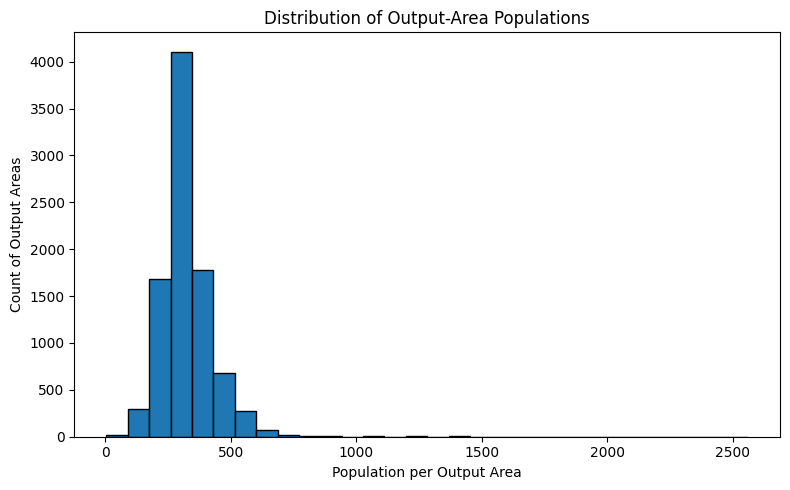

In [5]:
plt.figure(figsize=(8,5))
popden["Total"].plot(kind="hist", bins=30, edgecolor="black")
plt.title("Distribution of Output-Area Populations")
plt.xlabel("Population per Output Area")
plt.ylabel("Count of Output Areas")
plt.tight_layout()
plt.show()

In [6]:
merged = popden.merge(urban, on="OA21CD", how="left")
popden_urbanrural = merged[['LAD2021','OA21CD','Total','Urban_rural_flag']]

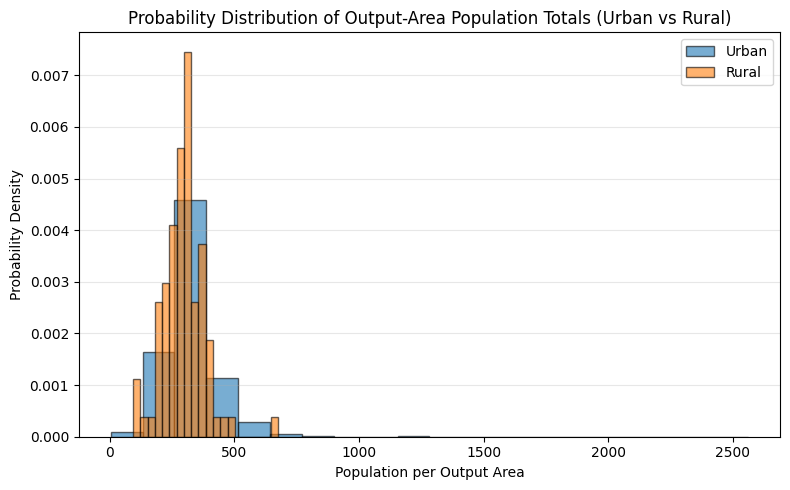

In [7]:

urban  = popden_urbanrural[popden_urbanrural["Urban_rural_flag"].str.lower() == "urban"]["Total"]
rural  = popden_urbanrural[popden_urbanrural["Urban_rural_flag"].str.lower() == "rural"]["Total"]

plt.figure(figsize=(8, 5))
plt.hist(urban, bins=20, alpha=0.6, density=True, label="Urban", edgecolor="black")
plt.hist(rural, bins=20, alpha=0.6, density=True, label="Rural", edgecolor="black")

plt.title("Probability Distribution of Output-Area Population Totals (Urban vs Rural)")
plt.xlabel("Population per Output Area")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

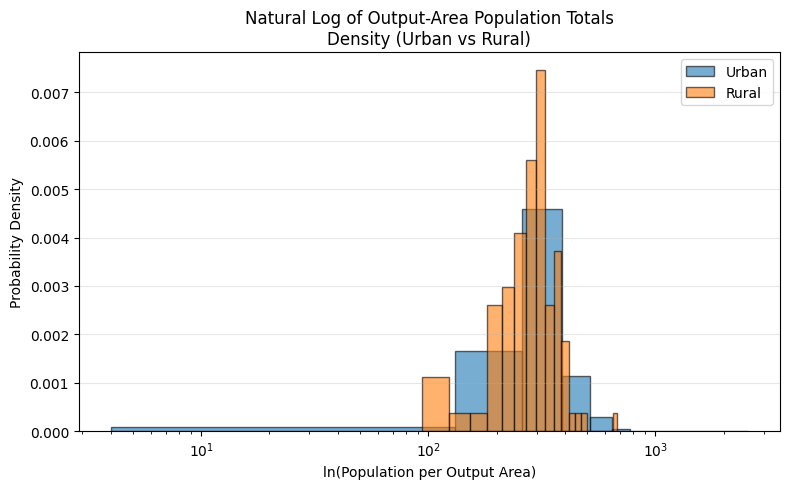

In [29]:
plt.figure(figsize=(8,5))
plt.hist(urban, bins=20, alpha=0.6, density=True, label="Urban", edgecolor="black")
plt.hist(rural, bins=20, alpha=0.6, density=True, label="Rural", edgecolor="black")

plt.xscale("log")
plt.title("Natural Log of Output-Area Population Totals\nDensity (Urban vs Rural)")
plt.xlabel("ln(Population per Output Area)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

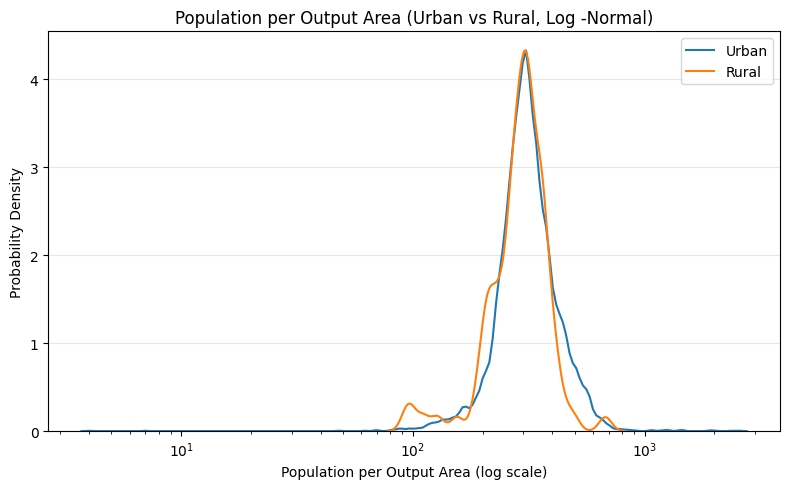

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(urban, bw_adjust=0.5, log_scale=True, label="Urban", fill=False)
sns.kdeplot(rural, bw_adjust=0.5, log_scale=True, label="Rural", fill=False)
# Use a log scale for the x-axis
plt.xscale("log")

plt.title("Population per Output Area (Urban vs Rural, Log -Normal)")
plt.xlabel("Population per Output Area (log scale)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()

### DISABILITY RATE

In [10]:
disability = pd.read_csv("data/disabled.csv")
total_disability = disability.groupby('Disability (3 categories)')['Observation'].sum()
print(total_disability)

Disability (3 categories)
Disabled under the Equality Act         525975
Does not apply                               0
Not disabled under the Equality Act    2341787
Name: Observation, dtype: int64


In [11]:
disability_probs = total_disability / total_disability.sum()
print(disability_probs)

Disability (3 categories)
Disabled under the Equality Act        0.18341
Does not apply                         0.00000
Not disabled under the Equality Act    0.81659
Name: Observation, dtype: float64


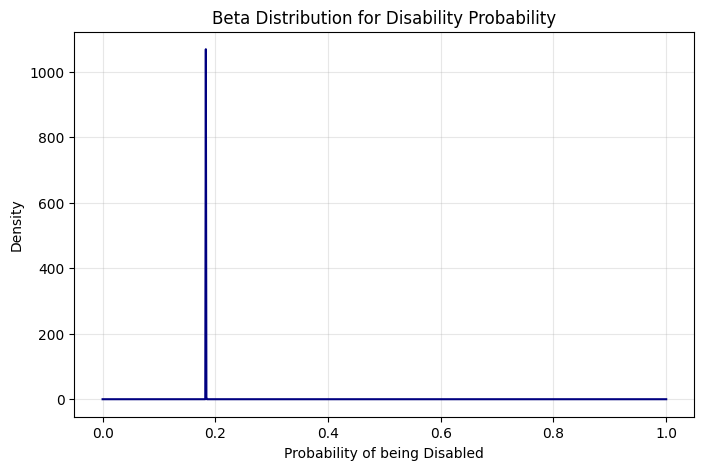

In [12]:
disabled_count = total_disability.get('Disabled under the Equality Act', 0)
not_disabled_count = total_disability.get('Not disabled under the Equality Act', 0)

alpha = disabled_count + 1
beta_param = not_disabled_count + 1

x = np.linspace(0, 1, 1000)  # probability range from 0 to 1
y = beta.pdf(x, alpha, beta_param)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="navy")
plt.title("Beta Distribution for Disability Probability")
plt.xlabel("Probability of being Disabled")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

### ENGLISH PROFICIENCY

In [13]:
english = pd.read_csv("data/english_proficiency.csv")   
total_english = english.groupby('Proficiency in English language (4 categories)')['Observation'].sum()
print(total_english)

Proficiency in English language (4 categories)
Does not apply                                                                                                  102157
Main language is English (English or Welsh in Wales)                                                           2497363
Main language is not English (English or Welsh in Wales): Can speak English very well or well                   201828
Main language is not English (English or Welsh in Wales): Cannot speak English or cannot speak English well      66412
Name: Observation, dtype: int64


In [14]:
def map_proficiency(category):
    if category in [
        "Main language is English (English or Welsh in Wales)",
        "Main language is not English (English or Welsh in Wales): Can speak English very well or well"
    ]:
        return "Good English Proficiency"
    elif category == "Main language is not English (English or Welsh in Wales): Cannot speak English or cannot speak English well":
        return "Bad English Proficiency"
    else:
        return None

# Apply mapping
english['Proficiency_Group'] = english['Proficiency in English language (4 categories)'].apply(map_proficiency)

# Sum observations per new group
grouped_english = english.groupby('Proficiency_Group')['Observation'].sum()
print(grouped_english)

Proficiency_Group
Bad English Proficiency       66412
Good English Proficiency    2699191
Name: Observation, dtype: int64


In [15]:
english_probs = grouped_english / grouped_english.sum()
print(english_probs)

Proficiency_Group
Bad English Proficiency     0.024014
Good English Proficiency    0.975986
Name: Observation, dtype: float64


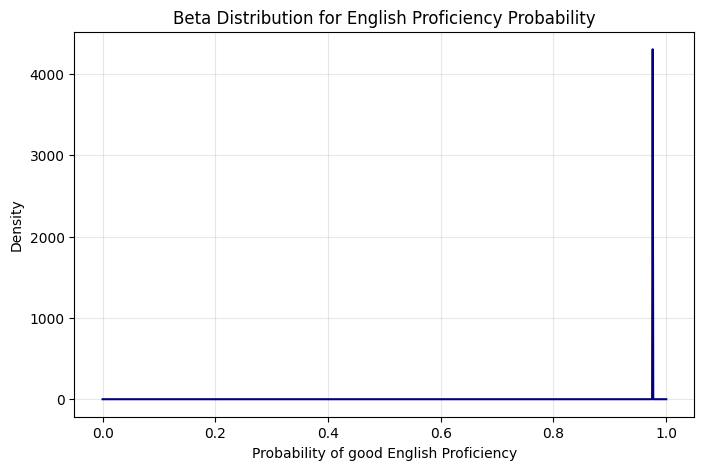

In [16]:
good_english_count = grouped_english.get('Good English Proficiency', 0)
bad_english_count = grouped_english.get('Bad English Proficiency', 0)

alpha = good_english_count + 1
beta_param = bad_english_count + 1

x = np.linspace(0, 1, 1000)  # probability range from 0 to 1
y = beta.pdf(x, alpha, beta_param)

plt.figure(figsize=(8, 5))
plt.plot(x, y, color="navy")
plt.title("Beta Distribution for English Proficiency Probability")
plt.xlabel("Probability of good English Proficiency")
plt.ylabel("Density")
plt.grid(True, alpha=0.3)
plt.show()

### Low-income

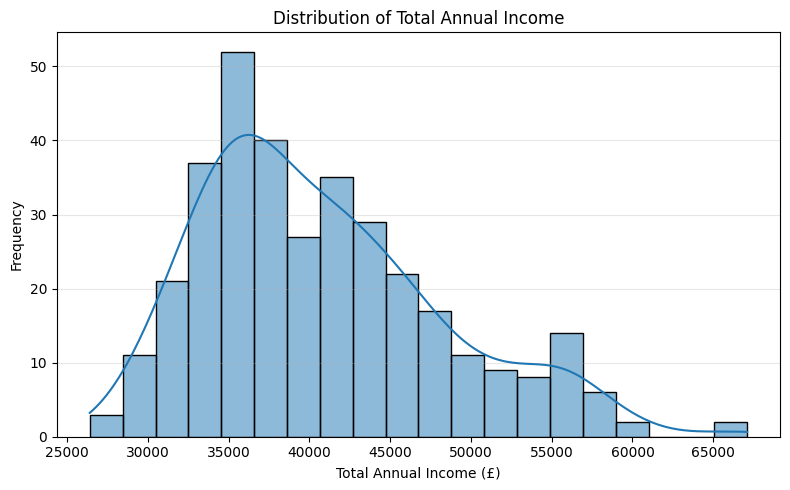

In [33]:
income = pd.read_csv("data/mean_income.csv")
income['Total annual income (£)'] = (
    income['Total annual income (£)']
    .str.strip()        
    .str.replace(',', '')      
    .astype(float)       
)
plt.figure(figsize=(8,5))
sns.histplot(income['Total annual income (£)'], bins=20, kde=True, edgecolor='black')

plt.title('Distribution of Total Annual Income')
plt.xlabel('Total Annual Income (£)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


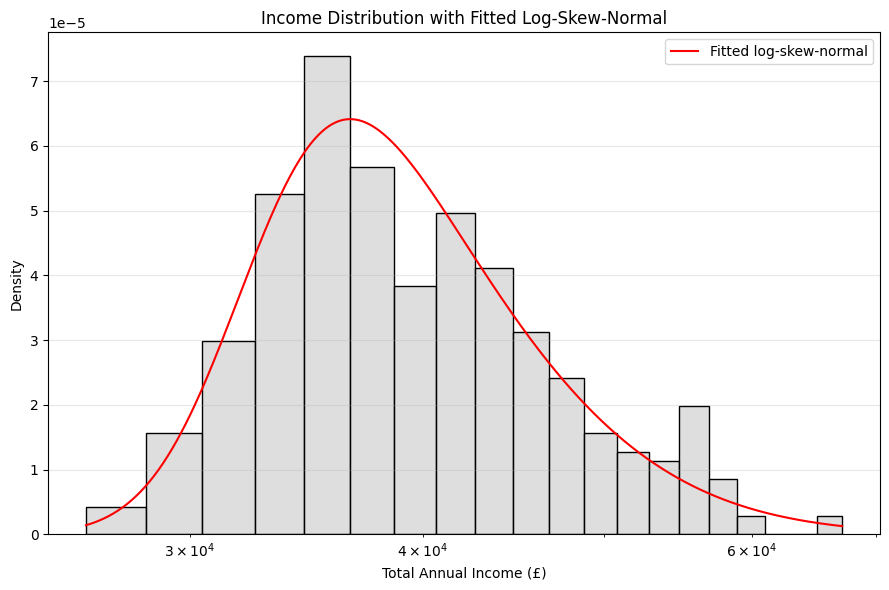

In [ ]:
from scipy.stats import skewnorm

log_income = np.log(income['Total annual income (£)'])

# Fit a skew-normal distribution to the log of the data
shape, loc, scale = skewnorm.fit(log_income)

# Generate fitted values (PDF) for plotting
x = np.linspace(log_income.min(), log_income.max(), 500)
pdf_fitted = skewnorm.pdf(x, shape, loc, scale)

# Convert back to original scale for x-axis
x_original = np.exp(x)
pdf_original = pdf_fitted / x_original  # adjust for log transform

# Plot the histogram of actual income data
plt.figure(figsize=(9,6))
sns.histplot(income['Total annual income (£)'], bins=20, kde=False, stat='density', edgecolor='black', color='lightgray')

# Plot the fitted log-skew-normal distribution
plt.plot(x_original, pdf_original, 'r-', label='Fitted log-skew-normal')

plt.xscale('log')  # optional: log scale makes skew clearer
plt.title('Income Distribution with Fitted Log-Skew-Normal')
plt.xlabel('Total Annual Income (£)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

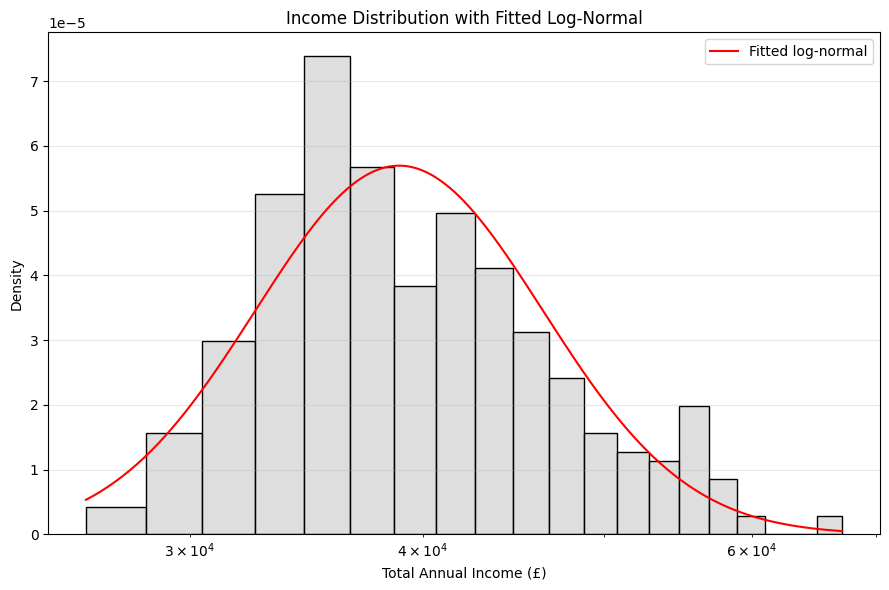

In [ ]:
from scipy.stats import lognorm

# Take the log of the income values is not needed here, lognorm works on original data
data = income['Total annual income (£)']

# Fit a log-normal distribution to the data
shape, loc, scale = lognorm.fit(data, floc=0)  # fix loc=0 for standard log-normal

# Generate fitted values (PDF) for plotting
x = np.linspace(data.min(), data.max(), 500)
pdf_fitted = lognorm.pdf(x, shape, loc, scale)

# Plot the histogram of actual income data
plt.figure(figsize=(9,6))
sns.histplot(data, bins=20, kde=False, stat='density', edgecolor='black', color='lightgray')

# Plot the fitted log-normal distribution
plt.plot(x, pdf_fitted, 'r-', label='Fitted log-normal')

plt.xscale('log')  # optional: log scale to show skew clearly
plt.title('Income Distribution with Fitted Log-Normal')
plt.xlabel('Total Annual Income (£)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

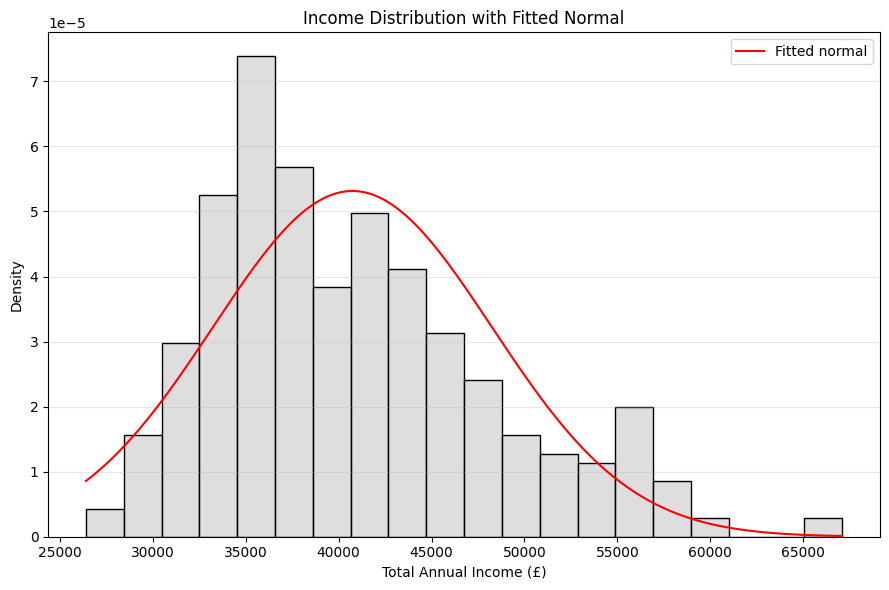

In [37]:
from scipy.stats import norm

mu, sigma = norm.fit(data)  # mean and standard deviation

# Generate fitted values (PDF) for plotting
x = np.linspace(data.min(), data.max(), 500)
pdf_fitted = norm.pdf(x, mu, sigma)

# Plot the histogram of actual income data
plt.figure(figsize=(9,6))
sns.histplot(data, bins=20, kde=False, stat='density', edgecolor='black', color='lightgray')

# Plot the fitted normal distribution
plt.plot(x, pdf_fitted, 'r-', label='Fitted normal')

plt.title('Income Distribution with Fitted Normal')
plt.xlabel('Total Annual Income (£)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

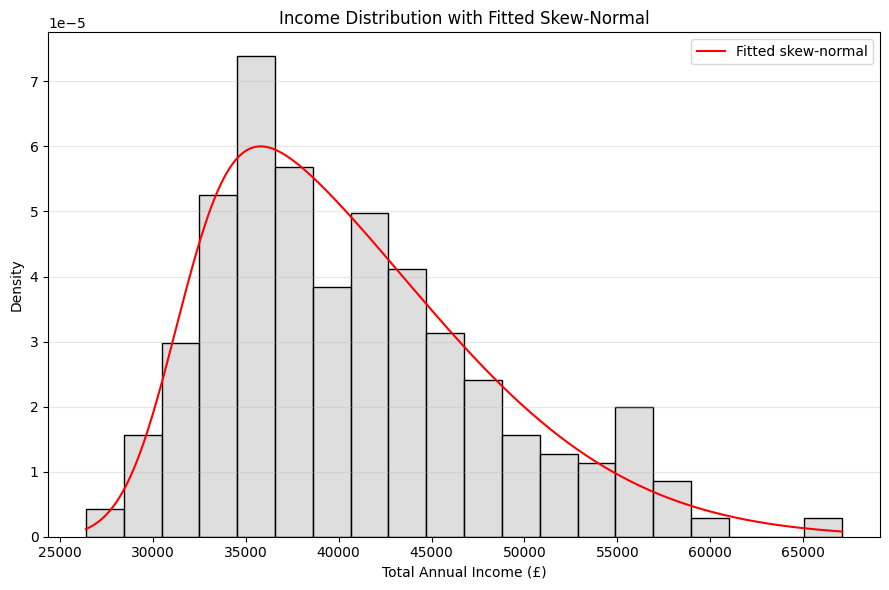

In [38]:
shape, loc, scale = skewnorm.fit(data)

# Generate fitted values (PDF) for plotting
x = np.linspace(data.min(), data.max(), 500)
pdf_fitted = skewnorm.pdf(x, shape, loc, scale)

# Plot the histogram of actual income data
plt.figure(figsize=(9,6))
sns.histplot(data, bins=20, kde=False, stat='density', edgecolor='black', color='lightgray')

# Plot the fitted skew-normal distribution
plt.plot(x, pdf_fitted, 'r-', label='Fitted skew-normal')

plt.title('Income Distribution with Fitted Skew-Normal')
plt.xlabel('Total Annual Income (£)')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### MEAN PROPERTY VALUE

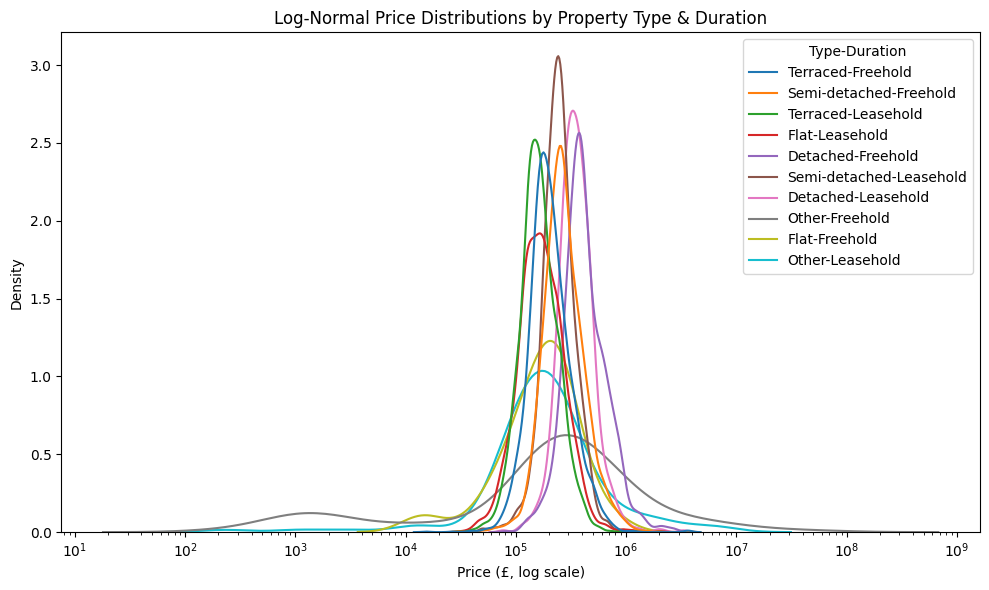

In [ ]:
property = pd.read_csv("data/property_value.csv")
df = property.dropna(subset=['price', 'property_type', 'duration'])
df = df[df['price'] > 0]

type_map = {
    "T": "Terraced",
    "S": "Semi-detached",
    "D": "Detached",
    "F": "Flat",
    "O": "Other"
}

duration_map = {
    "F": "Freehold",
    "L": "Leasehold"
}
df["property_type"] = df["property_type"].map(type_map)
df["duration"] = df["duration"].map(duration_map)
df['Type-Duration'] = df['property_type'].astype(str) + "-" + df['duration'].astype(str)

# Plot overlapping distributions on a log scale
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="price",
    hue="Type-Duration",
    fill=False,
    common_norm=False,
    log_scale=True 
)

plt.title("Log-Normal Price Distributions by Property Type & Duration")
plt.xlabel("Price (£, log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

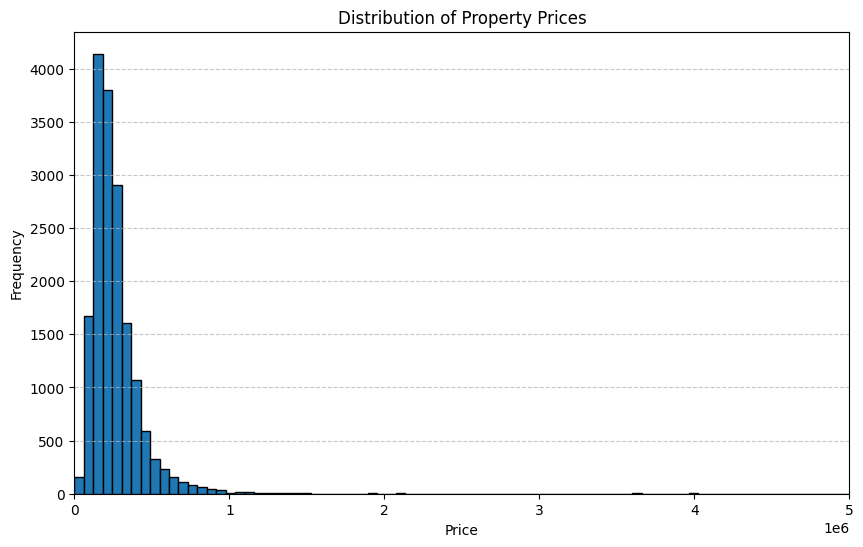

In [56]:
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=1000, edgecolor='black')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 5000000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

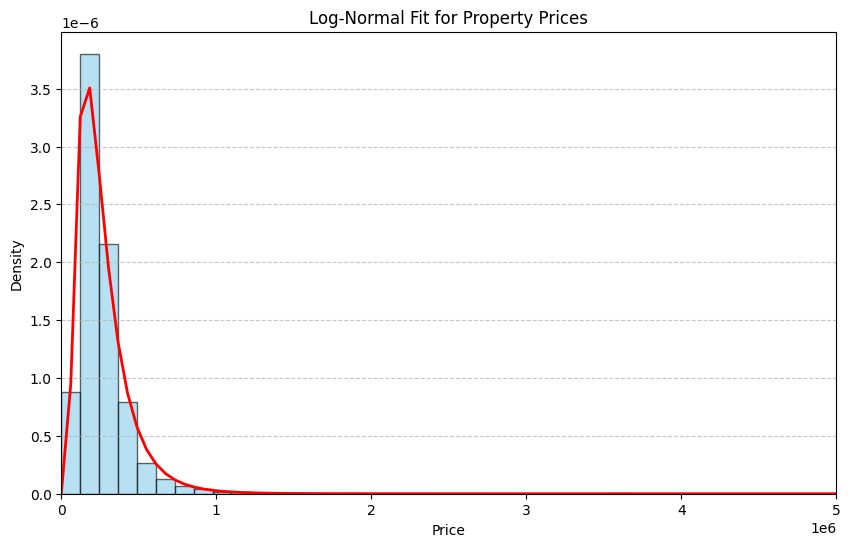

In [60]:
price = df['price']
shape, loc, scale = lognorm.fit(price, floc=0)  # fix location=0 for typical lognormal

# Plot histogram of actual data
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(price, bins=500, density=True, alpha=0.6, color='skyblue', edgecolor='black')

# Plot the fitted log-normal PDF
x = np.linspace(price.min(), price.max(), 1000)
pdf = lognorm.pdf(x, shape, loc, scale)
plt.plot(x, pdf, 'r', linewidth=2)

plt.title('Log-Normal Fit for Property Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.xlim(0, 5000000)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

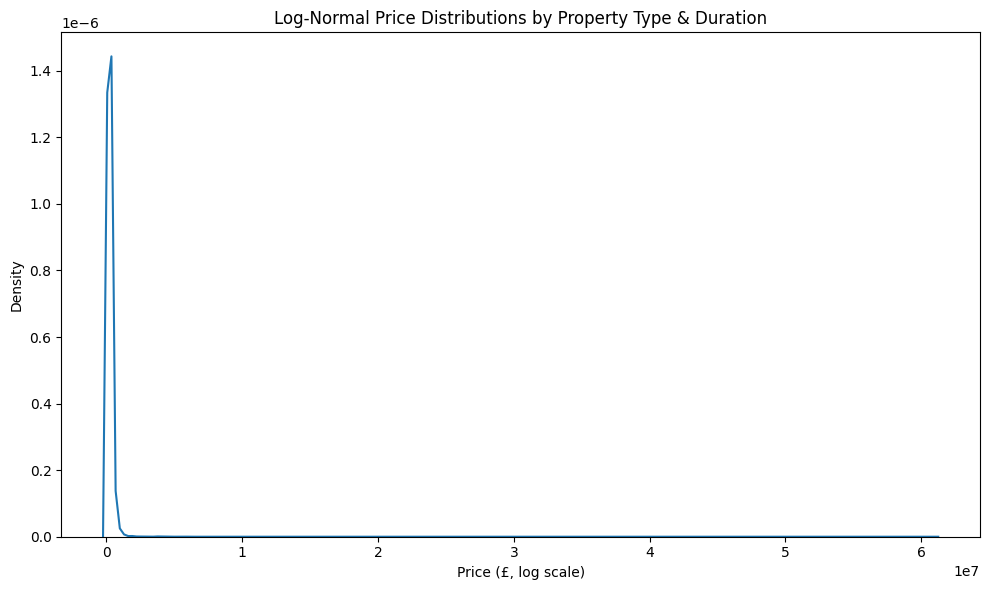

In [61]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="price",
    fill=False,
    common_norm=False,
    log_scale=False 
)

plt.title("Log-Normal Price Distributions by Property Type & Duration")
plt.xlabel("Price (£, log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

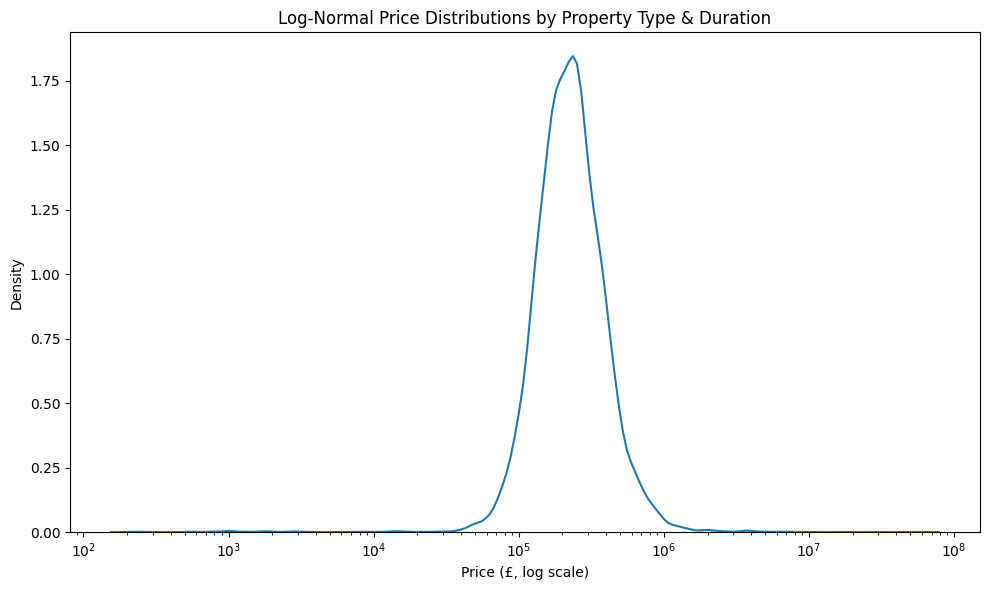

In [59]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=df,
    x="price",
    fill=False,
    common_norm=False,
    log_scale=True 
)

plt.title("Log-Normal Price Distributions by Property Type & Duration")
plt.xlabel("Price (£, log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

### DISTANCE TO WATER

In [19]:
shapefile_path = "data/water_dist/Watercourse.shp"
gdf = gpd.read_file(shapefile_path)

#gdf.to_csv("Watercourse.csv")
gdf = gdf[~gdf.geometry.is_empty].copy()
gdf.head()

,name1,identifier,startNode,endNode,form,flow,fictitious,length,name2,geometry
0,None,4F9D4F34-F9D4-4584-A198-3DA9078F0F26,28BCA985-5D27-471B-91DE-68BB336B4B1E,B0BD9600-1CEC-47F2-87B1-5D772A28EE1D,lake,in direction,false,602,None,"LINESTRING Z (396545 420759 0, 396509.37 42067..."
1,None,DDCE5CD7-EE06-4510-8843-2F39E6B6EB0C,1C2F610B-57ED-4CCC-A8E1-0D8043E27397,95E8F126-341B-4E83-9844-7F1E3B68E1F7,lake,in direction,false,322,None,"LINESTRING Z (396117.97 420377.04 0, 396032.64..."
2,None,8EA0E400-43C9-41BC-8609-EEBBCF1B69F1,887A8038-32C2-44D9-B255-AA091E428B5E,97A5C4AE-0661-4391-9705-36BD736631F2,inlandRiver,in direction,false,140,None,"MULTILINESTRING Z ((396473.05 420737.08 0, 396..."
3,None,A9F068B2-F3DB-4EE8-ADCF-4763EC76CC1D,12A7F149-C5DD-4F53-A295-3029C9BD1B7B,28BCA985-5D27-471B-91DE-68BB336B4B1E,inlandRiver,in direction,false,71,None,"LINESTRING Z (396545.519 420770.424 0, 396545 ..."
4,River Roch,9F69086D-A577-4A69-9F24-B553AC6B27C9,0F047099-F7B5-48D3-9945-1044A5A65752,713A776F-AD05-46BD-8F54-2939CD1A72EC,inlandRiver,in direction,false,736,None,"LINESTRING Z (394550.23 417843.45 0, 394526 41..."


In [20]:
'''
# used to created the watercourse density shapefile of 1 km grid cells

import geopandas as gpd
from shapely.geometry import box
import numpy as np


def grid_density(gdf_lines, cell_size_m=1000, clip_shapefile=None):
    """Return a GeoDataFrame of square cells with columns: area_km2, length_km, density_km_per_km2"""
    minx, miny, maxx, maxy = gdf_lines.total_bounds
    # extend bounds a touch so edges align
    xmin = np.floor(minx / cell_size_m) * cell_size_m
    ymin = np.floor(miny / cell_size_m) * cell_size_m
    xmax = np.ceil(maxx / cell_size_m) * cell_size_m
    ymax = np.ceil(maxy / cell_size_m) * cell_size_m

    xs = np.arange(xmin, xmax, cell_size_m)
    ys = np.arange(ymin, ymax, cell_size_m)

    cells = []
    for x in xs:
        for y in ys:
            cells.append(box(x, y, x + cell_size_m, y + cell_size_m))

    cells_gdf = gpd.GeoDataFrame({"geometry": cells}, crs=gdf_lines.crs)
    cells_gdf["area_km2"] = (cell_size_m * cell_size_m) / 1e6  # constant per cell

    if clip_shapefile is not None:
        if isinstance(clip_shapefile, str):
            clip_gdf = gpd.read_file(clip_shapefile).to_crs(gdf_lines.crs)
        else:
            clip_gdf = clip_shapefile.to_crs(gdf_lines.crs)

        # test centroids
        cells_gdf = cells_gdf[cells_gdf.centroid.within(clip_gdf.unary_union)]

    lengths = []
    for cell in cells_gdf.geometry:
        inter = gdf_lines.geometry.intersection(cell)
        # some intersections return empty geometries; sum lengths
        total_m = sum(geom.length for geom in inter if not geom.is_empty)
        lengths.append(total_m / 1000.0)  # km

    cells_gdf["length_km"] = lengths
    cells_gdf["density_km_per_km2"] = cells_gdf["length_km"] / cells_gdf["area_km2"]

    return cells_gdf

# 1 km grid
shapefile_path = "data/Watercourse-rough/Watercourse-rough.shp"
gdf = gpd.read_file(shapefile_path)
gdf["length_km"] = gdf.geometry.length / 1000.0
clip_area = gpd.read_file("GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp")

# Compute density per 1 km^2 cells
grid = grid_density(gdf, cell_size_m=1000, clip_shapefile=clip_area)
grid.to_file("watercourse_density.shp")'''

'\n# used to created the watercourse density shapefile of 1 km grid cells\n\nimport geopandas as gpd\nfrom shapely.geometry import box\nimport numpy as np\n\n\ndef grid_density(gdf_lines, cell_size_m=1000, clip_shapefile=None):\n    """Return a GeoDataFrame of square cells with columns: area_km2, length_km, density_km_per_km2"""\n    minx, miny, maxx, maxy = gdf_lines.total_bounds\n    # extend bounds a touch so edges align\n    xmin = np.floor(minx / cell_size_m) * cell_size_m\n    ymin = np.floor(miny / cell_size_m) * cell_size_m\n    xmax = np.ceil(maxx / cell_size_m) * cell_size_m\n    ymax = np.ceil(maxy / cell_size_m) * cell_size_m\n\n    xs = np.arange(xmin, xmax, cell_size_m)\n    ys = np.arange(ymin, ymax, cell_size_m)\n\n    cells = []\n    for x in xs:\n        for y in ys:\n            cells.append(box(x, y, x + cell_size_m, y + cell_size_m))\n\n    cells_gdf = gpd.GeoDataFrame({"geometry": cells}, crs=gdf_lines.crs)\n    cells_gdf["area_km2"] = (cell_size_m * cell_size_m) 

Average length per cell: 1.2529654633436476


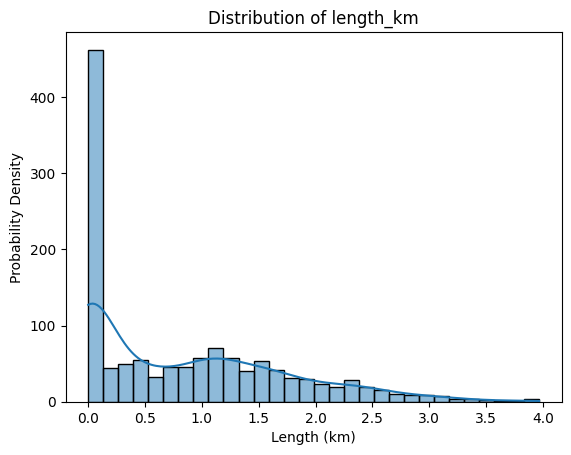

In [90]:

from scipy.stats import gamma

shapefile_path = "data/watercourse_density/watercourse_density.shp"
gdf = gpd.read_file(shapefile_path)

# Calculate total length and average length per cell
total_length = gdf["length_km"].sum()
average_length = total_length / (gdf.shape[0] - 420)  # your adjusted average
print(f"Average length per cell: {average_length}")

# Plot histogram of raw data
sns.histplot(gdf["length_km"], bins=30, kde=True, edgecolor="black")
plt.xlabel("Length (km)")
plt.ylabel("Probability Density")
plt.title("Distribution of length_km")
plt.show()


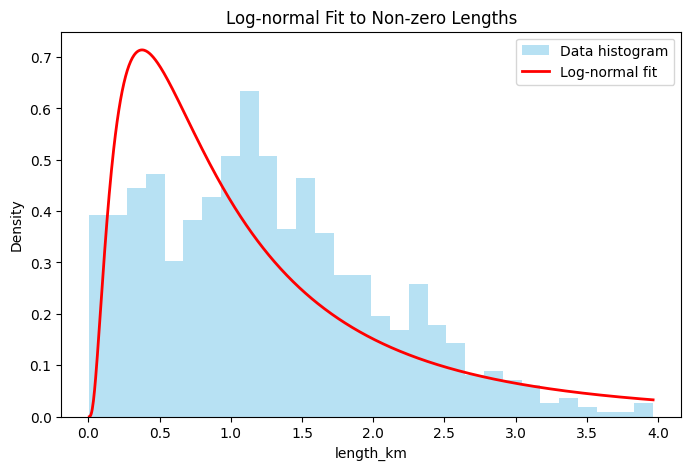

In [91]:
gdf_nonzero = gdf[gdf["length_km"] != 0].copy()
length_nonzero = gdf_nonzero["length_km"]

# Fit a log-normal distribution
shape, loc, scale = lognorm.fit(length_nonzero, floc=0)  # floc=0 forces location=0

# Generate x values for PDF
x = np.linspace(length_nonzero.min(), length_nonzero.max(), 1000)
pdf = lognorm.pdf(x, shape, loc, scale)

# Plot histogram and fitted log-normal PDF
plt.figure(figsize=(8,5))
plt.hist(length_nonzero, bins=30, density=True, alpha=0.6, color='skyblue', label="Data histogram")
plt.plot(x, pdf, 'r-', lw=2, label='Log-normal fit')
plt.xlabel("length_km")
plt.ylabel("Density")
plt.title("Log-normal Fit to Non-zero Lengths")
plt.legend()
plt.show()

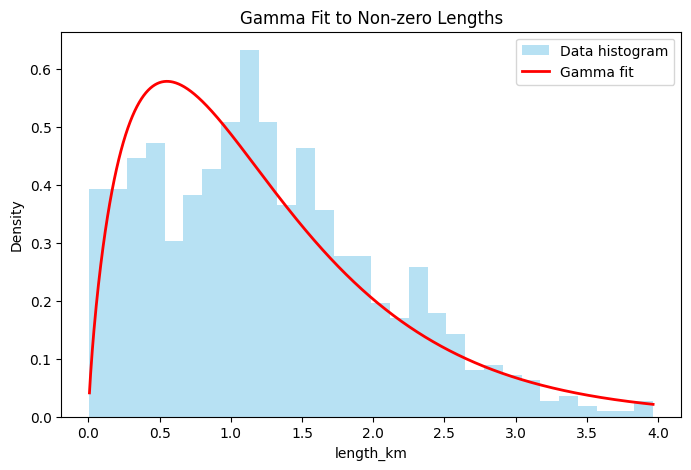

In [92]:
shape, loc, scale = gamma.fit(length_nonzero, floc=0)  # floc=0 forces location=0

# Generate x values for PDF
x = np.linspace(length_nonzero.min(), length_nonzero.max(), 1000)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)

# Plot histogram and fitted gamma PDF
plt.figure(figsize=(8,5))
plt.hist(length_nonzero, bins=30, density=True, alpha=0.6, color='skyblue', label="Data histogram")
plt.plot(x, pdf, 'r-', lw=2, label='Gamma fit')
plt.xlabel("length_km")
plt.ylabel("Density")
plt.title("Gamma Fit to Non-zero Lengths")
plt.legend()
plt.show()

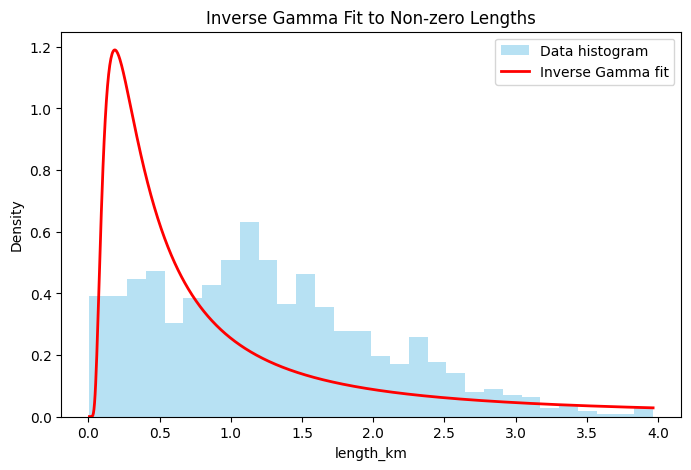

In [95]:
from scipy.stats import invgamma
a, loc, scale = invgamma.fit(length_nonzero, floc=0)

# Generate x values for PDF
x = np.linspace(length_nonzero.min(), length_nonzero.max(), 1000)
pdf = invgamma.pdf(x, a, loc=loc, scale=scale)

# Plot histogram and fitted inverse gamma PDF
plt.figure(figsize=(8,5))
plt.hist(length_nonzero, bins=30, density=True, alpha=0.6, color='skyblue', label="Data histogram")
plt.plot(x, pdf, 'r-', lw=2, label='Inverse Gamma fit')
plt.xlabel("length_km")
plt.ylabel("Density")
plt.title("Inverse Gamma Fit to Non-zero Lengths")
plt.legend()
plt.show()

In [ ]:
disability = pd.read_csv("data/disabled.csv")
total_disability = disability.groupby('Disability (3 categories)')['Observation'].sum()
#disability_probs = total_disability / total_disability.sum()

alpha = total_disability['Disabled under the Equality Act'] + 1
beta = total_disability['Not disabled under the Equality Act'] + 1

disabled_sample = np.random.beta(alpha, beta, size=1)[0]
print(disabled_sample)


0.18282935194095662


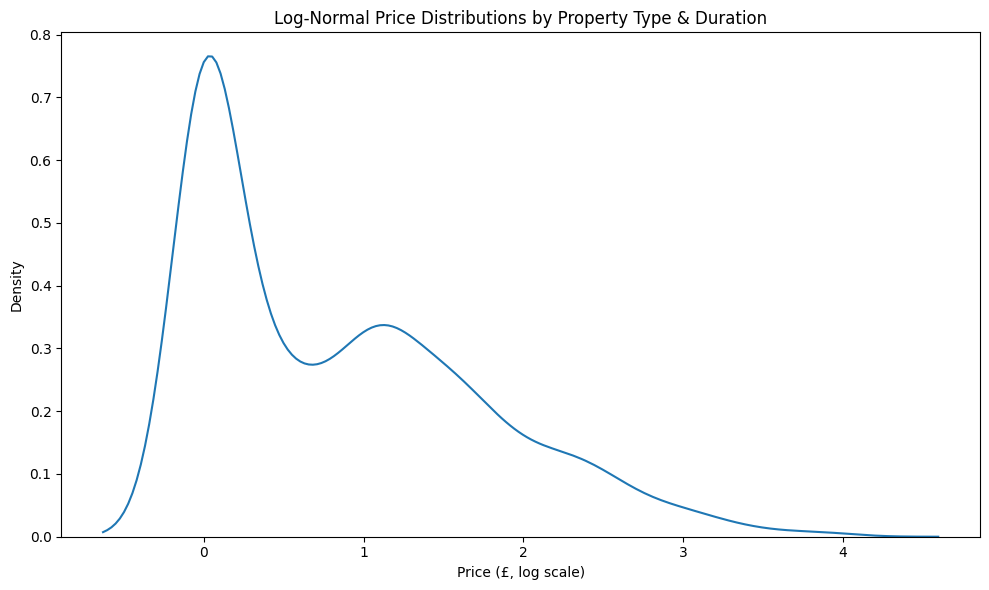

In [66]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=gdf,
    x="length_km",
    fill=False,
    common_norm=False,
    log_scale=False 
)

plt.title("Log-Normal Price Distributions by Property Type & Duration")
plt.xlabel("Price (£, log scale)")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

In [89]:
from scipy.optimize import minimize

# Example: Load your data
data = pd.read_csv("data/property_value.csv")['price'].dropna()
data = np.array(data)

# Negative log-likelihood function for zero-inflated lognormal
def ziln_nll(params, x):
    p_zero, mu, sigma = params
    
    # constrain p_zero between 0 and 1, sigma positive
    if not (0 <= p_zero <= 1 and sigma > 0):
        return np.inf
    
    # Separate zeros and positives
    zeros = x == 0
    positives = x[~zeros]
    
    # Log-likelihood for zeros: log(p_zero)
    ll_zeros = np.log(p_zero) * zeros.sum() if zeros.sum() > 0 else 0
    
    # Log-likelihood for positives: log(1 - p_zero) + log(LogNormal)
    if positives.size > 0:
        ll_pos = np.log(1 - p_zero) * positives.size
        ll_pos += lognorm.logpdf(positives, s=sigma, scale=np.exp(mu)).sum()
    else:
        ll_pos = 0
    
    # Total negative log-likelihood
    return -(ll_zeros + ll_pos)

# Initial guesses: p_zero from data, mu/sigma from positive part
p0_init = (data == 0).mean()
positive_data = data[data > 0]
mu_init = np.log(positive_data).mean() if positive_data.size > 0 else 0
sigma_init = np.log(positive_data).std() if positive_data.size > 0 else 1

initial_params = [p0_init, mu_init, sigma_init]

# Optimize
result = minimize(ziln_nll, initial_params, args=(data,), method='L-BFGS-B',
                  bounds=[(0,1), (None,None), (1e-6,None)])

p0_hat, mu_hat, sigma_hat = result.x

print("Estimated parameters:")
print(f"p_zero  = {p0_hat:.4f}")
print(f"mu      = {mu_hat:.4f}")
print(f"sigma   = {sigma_hat:.4f}")

def sample_ziln(n, p_zero, mu, sigma):
    # Step 1: decide zeros
    zeros = np.random.rand(n) < p_zero
    # Step 2: sample positives
    positives = lognorm.rvs(s=sigma, scale=np.exp(mu), size=n)
    # Combine
    samples = np.where(zeros, 0, positives)
    return samples

synthetic = sample_ziln(1, p0_hat, mu_hat, sigma_hat)
print(synthetic)

Estimated parameters:
p_zero  = 0.0000
mu      = 12.3211
sigma   = 0.5846
[209861.83057423]


In [22]:
'''import geopandas as gpd
from shapely.geometry import Point
shapefile_path = "GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp"
gdf = gpd.read_file(shapefile_path)

#gdf.to_csv("Watercourse.csv")
gdf.head()

def grid_points_in_polygon(polygon, spacing=50):
    """
    Generate uniform points inside a polygon.
    spacing: distance between points in CRS units (e.g., meters)
    """
    minx, miny, maxx, maxy = polygon.bounds
    x_coords = np.arange(minx, maxx, spacing)
    y_coords = np.arange(miny, maxy, spacing)
    points = [Point(x, y) for x in x_coords for y in y_coords if polygon.contains(Point(x, y))]
    return points

# Read area shapefile (could be points or polygons)
area_gdf = gpd.read_file("GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp")
# Read watercourse shapefile
water_gdf = gpd.read_file("data/Watercourse-rough/Watercourse-rough.shp")

polygon = area_gdf.geometry.iloc[0]
uniform_points = grid_points_in_polygon(polygon, spacing=50)

points_gdf = gpd.GeoDataFrame(geometry=uniform_points, crs=area_gdf.crs)
water_union = water_gdf.union_all()

# Compute distances
points_gdf["distance_to_water"] = points_gdf.geometry.apply(lambda x: x.distance(water_union))
points_gdf.to_file("watercourse_distance.shp")'''


'import geopandas as gpd\nfrom shapely.geometry import Point\nshapefile_path = "GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp"\ngdf = gpd.read_file(shapefile_path)\n\n#gdf.to_csv("Watercourse.csv")\ngdf.head()\n\ndef grid_points_in_polygon(polygon, spacing=50):\n    """\n    Generate uniform points inside a polygon.\n    spacing: distance between points in CRS units (e.g., meters)\n    """\n    minx, miny, maxx, maxy = polygon.bounds\n    x_coords = np.arange(minx, maxx, spacing)\n    y_coords = np.arange(miny, maxy, spacing)\n    points = [Point(x, y) for x in x_coords for y in y_coords if polygon.contains(Point(x, y))]\n    return points\n\n# Read area shapefile (could be points or polygons)\narea_gdf = gpd.read_file("GM_shapefile/CAUTH_MAY_2025_EN_BSC.shp")\n# Read watercourse shapefile\nwater_gdf = gpd.read_file("data/Watercourse-rough/Watercourse-rough.shp")\n\npolygon = area_gdf.geometry.iloc[0]\nuniform_points = grid_points_in_polygon(polygon, spacing=50)\n\npoints_gdf = gpd.GeoDataFra

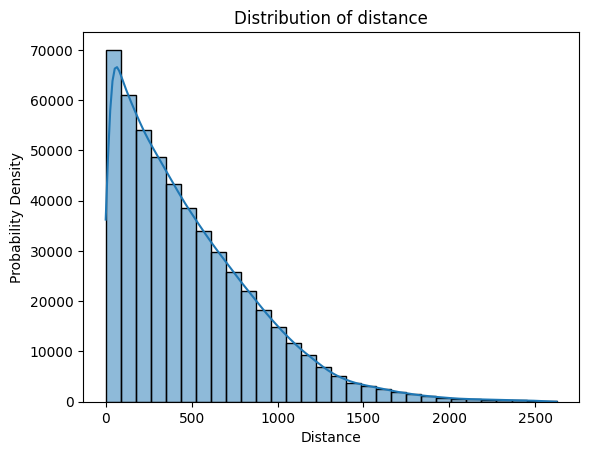

In [23]:
gdf = gpd.read_file("data/watercourse_distance/watercourse_distance.shp")
#gdf.to_csv("watercourse_distance.csv")

'''# Calculate total length and average length per cell
total_length = gdf["length_km"].sum()
average_length = total_length / (gdf.shape[0] - 440)  # your adjusted average
print(f"Average length per cell: {average_length}")'''

# Plot histogram of raw data
sns.histplot(gdf["distance_t"], bins=30, kde=True, edgecolor="black")
plt.xlabel("Distance")
plt.ylabel("Probability Density")
plt.title("Distribution of distance")
plt.show()

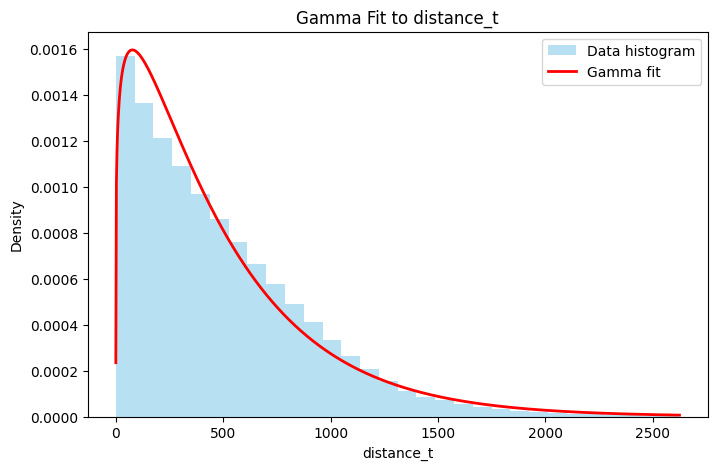

In [97]:
gdf = gpd.read_file("data/watercourse_distance/watercourse_distance.shp")

# Extract distance column
distance = gdf["distance_t"]

# Remove zeros if any (Gamma is strictly positive)

# Fit Gamma distribution
shape, loc, scale = gamma.fit(distance, floc=0)  # floc=0 ensures strictly positive

# Generate x values for PDF
x = np.linspace(distance.min(), distance.max(), 1000)
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)

# Plot histogram and fitted Gamma PDF
plt.figure(figsize=(8,5))
plt.hist(distance, bins=30, density=True, alpha=0.6, color='skyblue', label="Data histogram")
plt.plot(x, pdf, 'r-', lw=2, label='Gamma fit')
plt.xlabel("distance_t")
plt.ylabel("Density")
plt.title("Gamma Fit to distance_t")
plt.legend()
plt.show()

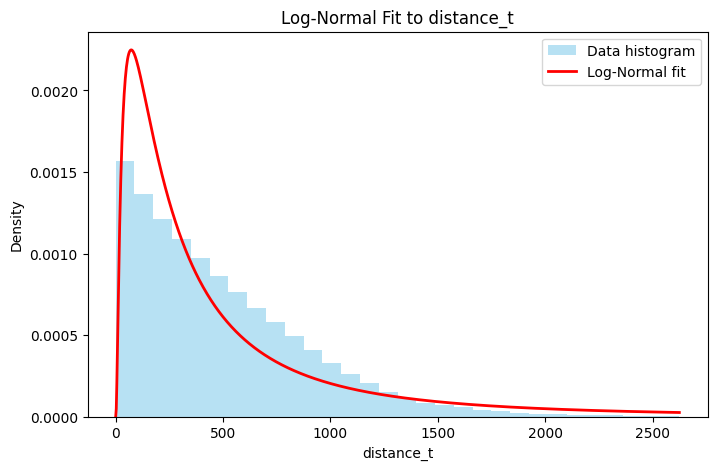

In [98]:
shape, loc, scale = lognorm.fit(distance, floc=0)  # floc=0 ensures strictly positive

# Generate x values for PDF
x = np.linspace(distance.min(), distance.max(), 1000)
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

# Plot histogram and fitted log-normal PDF
plt.figure(figsize=(8,5))
plt.hist(distance, bins=30, density=True, alpha=0.6, color='skyblue', label="Data histogram")
plt.plot(x, pdf, 'r-', lw=2, label='Log-Normal fit')
plt.xlabel("distance_t")
plt.ylabel("Density")
plt.title("Log-Normal Fit to distance_t")
plt.legend()
plt.show()

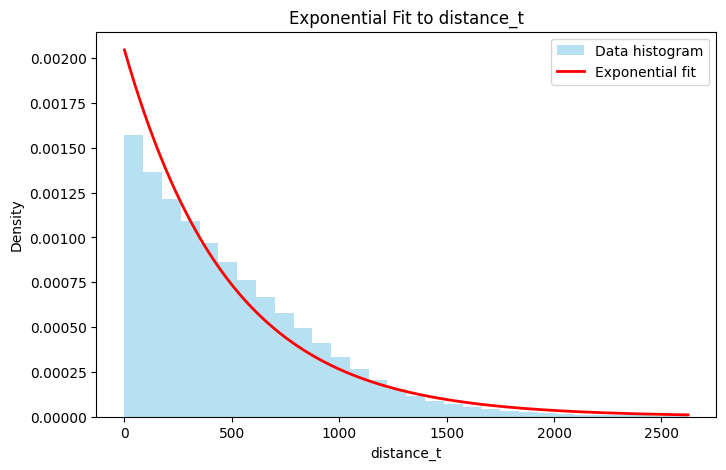

In [99]:
from scipy.stats import expon
loc, scale = expon.fit(distance, floc=0)  # floc=0 ensures distribution starts at 0

# Generate x values for PDF
x = np.linspace(distance.min(), distance.max(), 1000)
pdf = expon.pdf(x, loc=loc, scale=scale)

# Plot histogram and fitted Exponential PDF
plt.figure(figsize=(8,5))
plt.hist(distance, bins=30, density=True, alpha=0.6, color='skyblue', label="Data histogram")
plt.plot(x, pdf, 'r-', lw=2, label='Exponential fit')
plt.xlabel("distance_t")
plt.ylabel("Density")
plt.title("Exponential Fit to distance_t")
plt.legend()
plt.show()

### MEAN INCOME